# Bock parameterization, normalization (and 2PL)

This notebook illustrates the various parameterizations and normalization of the Bock model.
It also adds a few comparison with 2PL for k>2.

First version: 12/27/2021
This version: 1/3/2024

In [1]:
import sys
sys.path.append("../")
import numpy as np
from irt_models import (plot_figure,
                        Bock_IRT_response,
                        IRT_parameterization,
                        slope_intercept_parameterization,
                        normalize_Bock_parameterization,
                        Bock_normalized_IRT_response,
                        Bock_normalized_response,
                        transform_Bock_IRT_To_2PL,
                        TwoPL_response)
np.set_printoptions(precision=2)   # number of digits of precision for floating point output (default 8)

# 1: Reparameterization to slope-intercept and back to discrimination-difficulty

In [2]:
alpha = np.array([1, 2, 3])
beta = np.array([-5, 0, 5])

print("a, b:        ", alpha, beta)
alpha, beta = slope_intercept_parameterization(alpha, beta)
print("alpha, beta: ", alpha, beta)
a2, b2 = IRT_parameterization(alpha, beta)
print("a, b:        ", a2, b2)

a, b:         [1 2 3] [-5  0  5]
alpha, beta:  [1 2 3] [  5   0 -15]
a, b:         [1 2 3] [-5.  0.  5.]


# 2: Normalize the parameters and check if they give the same results. First in text, then as figure

In [3]:
low = -1
high = 1
num = 4
theta = np.linspace(low, high, num)

a0 = np.array([-10, 0, 10, 20])
b0 = np.array([-0.4, -0.2, 0, 0.2])
y0 = Bock_IRT_response(a0, b0, theta)

alpha1, beta1 = slope_intercept_parameterization(a0, b0)
alpha2, beta2 = normalize_Bock_parameterization(alpha1, beta1)
a3, b3 = IRT_parameterization(alpha2, beta2)
print("normalized (a,b):\n", a3, b3)

y3 = Bock_normalized_IRT_response(a3, b3, theta)

print ("Original response curves:\n",  y0)
print ("Normalized response curves:\n",  y3)

normalized (a,b):
 [10 20 30] [-0.4 -0.2 -0. ]
Original response curves:
 [[9.98e-01 3.31e-01 1.50e-05 9.33e-14]
 [2.47e-03 6.46e-01 2.30e-02 1.12e-07]
 [1.12e-07 2.30e-02 6.46e-01 2.47e-03]
 [9.33e-14 1.50e-05 3.31e-01 9.98e-01]]
Normalized response curves:
 [[9.98e-01 3.31e-01 1.50e-05 9.33e-14]
 [2.47e-03 6.46e-01 2.30e-02 1.12e-07]
 [1.12e-07 2.30e-02 6.46e-01 2.47e-03]
 [9.33e-14 1.50e-05 3.31e-01 9.98e-01]]


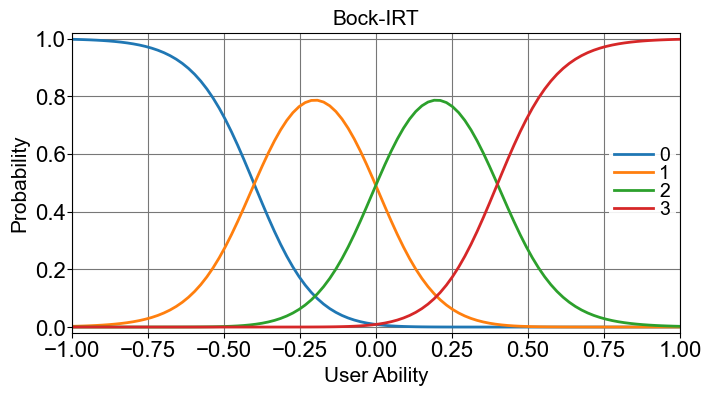

Normalized parameters:  [10 20 30] [-0.4 -0.2 -0. ]


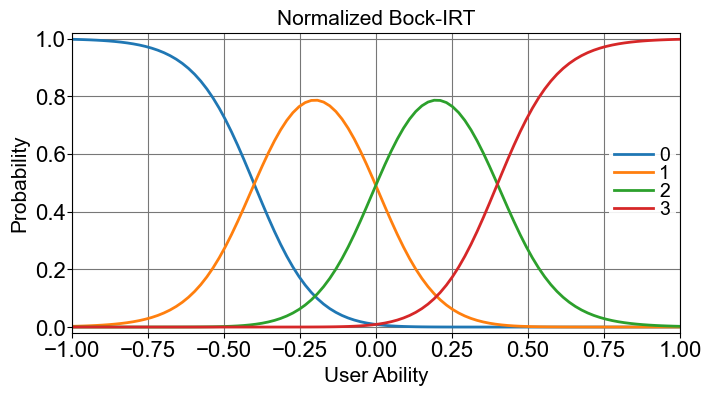

In [4]:
# Bock-IRT before and after normalization
low = -1
high = 1
num = 100
theta = np.linspace(low, high, num)

a0 = np.array([-10, 0, 10, 20])
b0 = np.array([-0.4, -0.2, 0, 0.2])

y0 = Bock_IRT_response(a0, b0, theta)
plot_figure(theta, y0, low, high, title =r"Bock-IRT")

alpha1, beta1 = slope_intercept_parameterization(a0, b0)
alpha2, beta2 = normalize_Bock_parameterization(alpha1, beta1)
a3, b3 = IRT_parameterization(alpha2, beta2)
print("Normalized parameters: ", a3, b3)

y3 = Bock_normalized_IRT_response(a3, b3, theta)
plot_figure(theta, y3, low, high, title =r"Normalized Bock-IRT")

# 3: The normalized slope-intercept parameterization is more general than the normalized discrimination-difficulty parameterization.

The reason is that there can be other questions with the same slope but different intercept as the "0 parameterization" (example: assume that there are 4 choices, with two each of 2 choices of the same slope). The 0 discriminaton also affects the difficulty, and thus it does not work out in the end.


In [ ]:
# Example that cannot be shown in normalized discrimination-difficult parameterization.
low = -2
high = 1
num = 100
theta = np.linspace(low, high, num)

alpha = np.array([0, 1, 10, 20])
beta = np.array([-2, -2, 0.1, 2])
y = Bock_normalized_response(alpha, beta, theta)
plot_figure(theta, y, low, high, title =r"Bock")

a, b = IRT_parameterization(alpha, beta)    # creates an error

# 4: How to combine the beta values from multiple 2nd highest a values?

Then compare  with the corresponding 2PL

Alpha, Beta: [10 10 20] [1 2 3]


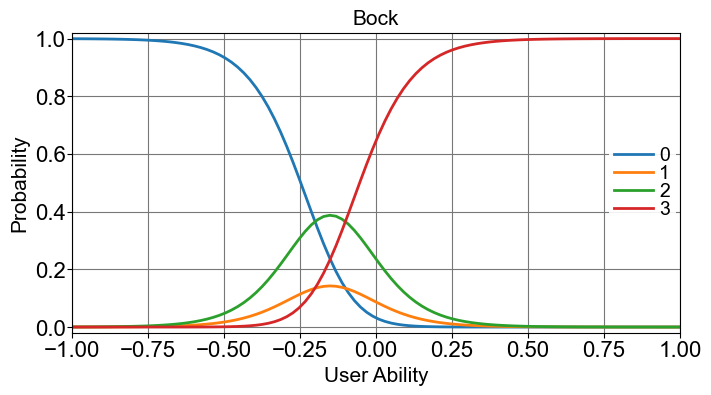

Alpha, Beta: [10 20] [2.31 3.  ]
a, b: [10 20] [-0.23 -0.15]


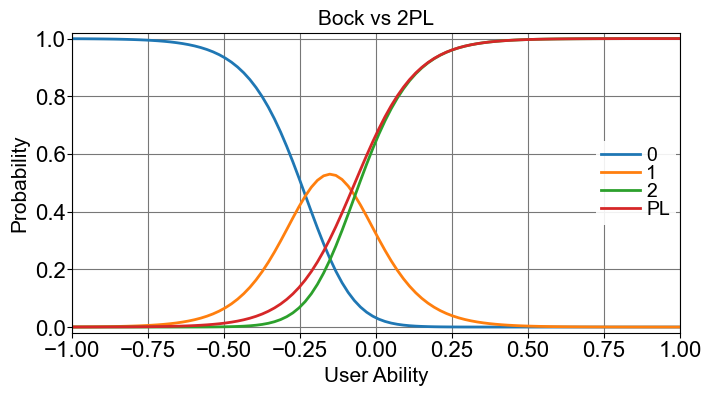

In [6]:
low = -1
high = 1
num = 100
theta = np.linspace(low, high, num)

beta1 = 1
beta2 = 2
alpha = np.array([10, 10, 20])
beta = np.array([beta1, beta2, 3])
y = Bock_normalized_response(alpha, beta, theta)
print("Alpha, Beta:", alpha, beta)
plot_figure(theta, y, low, high, title =r"Bock")

# calculate corresponding beta if we combine the two alpha=10 curves
beta3 = np.log(np.exp(beta1) + np.exp(beta2))
alpha = np.array([10, 20])
beta = np.array([beta3, 3])
y = Bock_normalized_response(alpha, beta, theta)
print("Alpha, Beta:", alpha, beta)

# In addition, show corresponding 2PL curves
a, b= IRT_parameterization(alpha, beta)
print("a, b:", a, b)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)  # corresponding 2PL
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))

# 5: What happens if the b vector entries are too close to each other?

In the extreme, a and b vectors are not sorted in the same order. Also showing the effect on the equivalent 2PL.

a, b: [10 20] [0.  0.5]


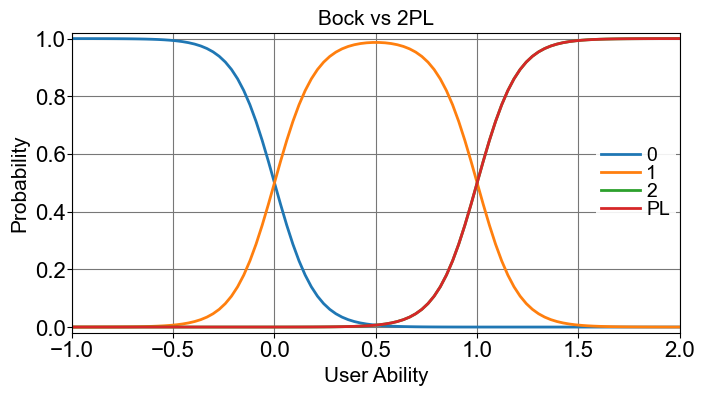

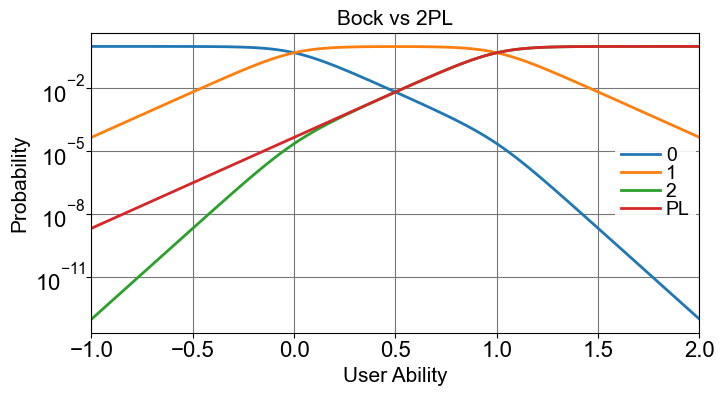

a, b: [10 20] [0.3 0.5]


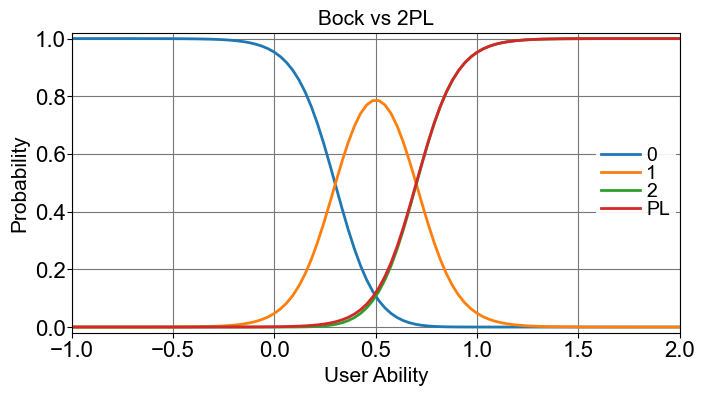

a, b: [10 20] [0.5 0.5]


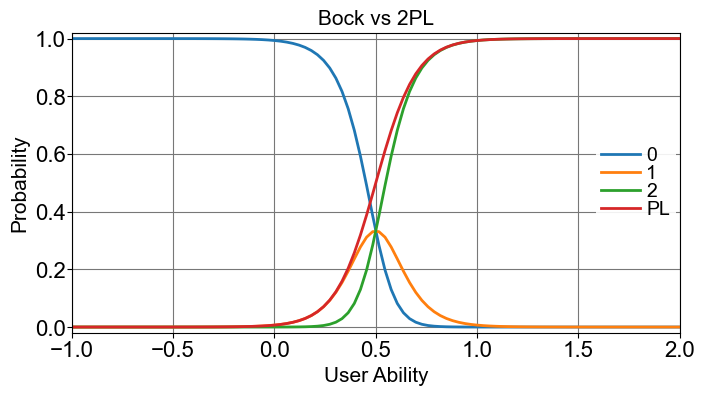

a, b: [10 20] [0.6 0.5]


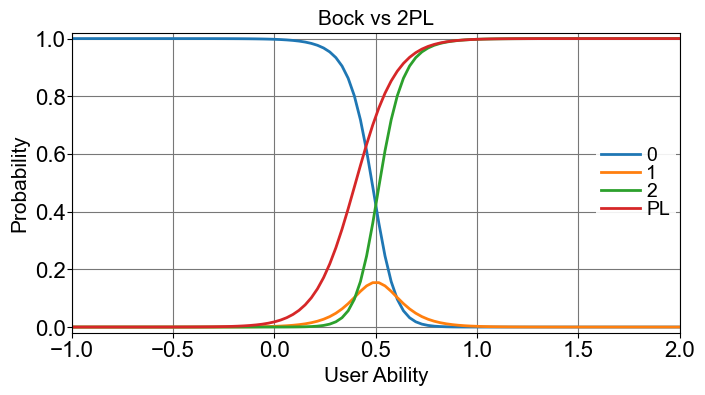

a, b: [10 20] [0.8 0.5]


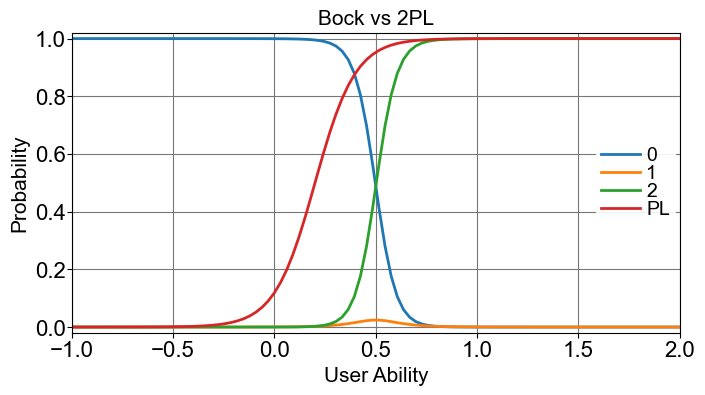

In [7]:
low = -1
high = 2
num = 100
theta = np.linspace(low, high, num)

a = np.array([10, 20])
b = np.array([0, 0.5])
y = Bock_normalized_IRT_response(a, b, theta)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)
print("a, b:", a, b)
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))

plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"), logscale=True)

a = np.array([10, 20])
b = np.array([0.3, 0.5])
y = Bock_normalized_IRT_response(a, b, theta)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)
print("a, b:", a, b)
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))

a = np.array([10, 20])
b = np.array([0.5, 0.5])
y = Bock_normalized_IRT_response(a, b, theta)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)
print("a, b:", a, b)
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))

a = np.array([10, 20])
b = np.array([0.6, 0.5])
y = Bock_normalized_IRT_response(a, b, theta)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)
print("a, b:", a, b)
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))

a = np.array([10, 20])
b = np.array([0.8, 0.5])
y = Bock_normalized_IRT_response(a, b, theta)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)
print("a, b:", a, b)
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))


#### Steeper curves help equate Bock and 2PL. Just once the b's are the same, steepness cannot help anymore

a, b: [ 5 10] [0.4 0.5]


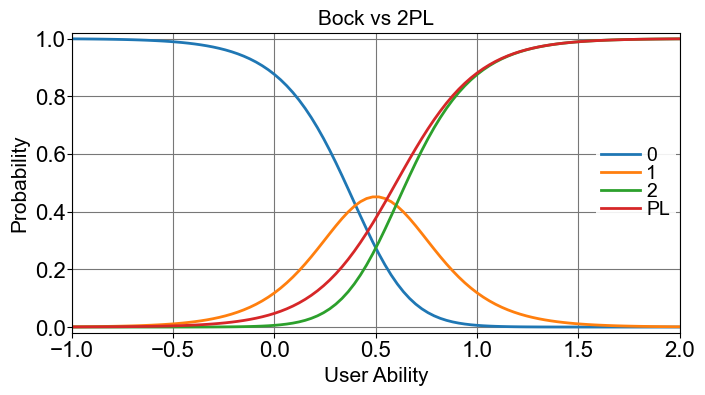

a, b: [10 20] [0.4 0.5]


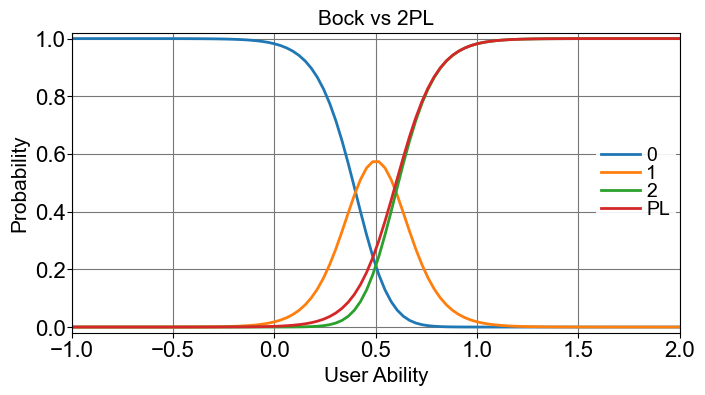

a, b: [20 40] [0.4 0.5]


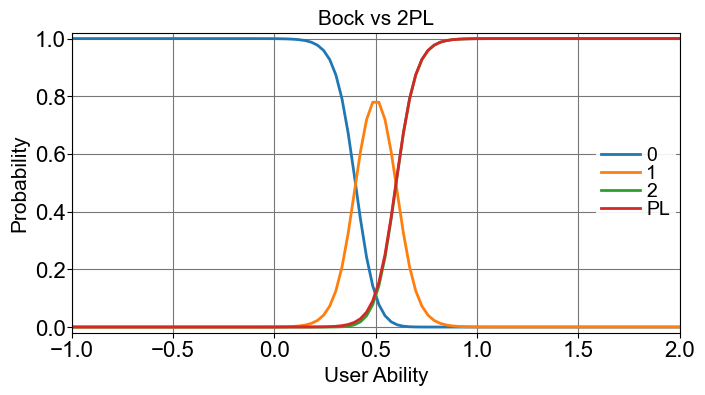

a, b: [10 20] [0.5 0.5]


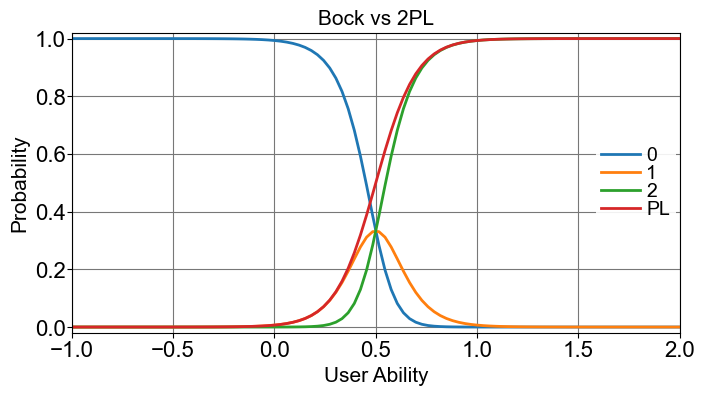

a, b: [20 40] [0.5 0.5]


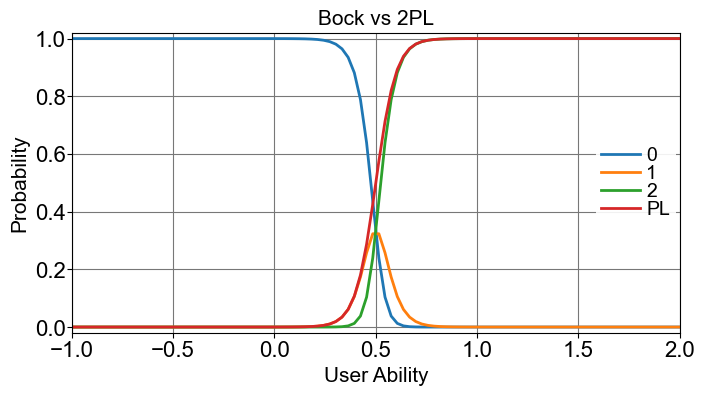

In [8]:
low = -1
high = 2
num = 100
theta = np.linspace(low, high, num)

a = np.array([5, 10])
b = np.array([0.4, 0.5])
y = Bock_normalized_IRT_response(a, b, theta)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)
print("a, b:", a, b)
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))

a = np.array([10, 20])
b = np.array([0.4, 0.5])
y = Bock_normalized_IRT_response(a, b, theta)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)
print("a, b:", a, b)
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))

a = np.array([20, 40])
b = np.array([0.4, 0.5])
y = Bock_normalized_IRT_response(a, b, theta)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)
print("a, b:", a, b)
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))

a = np.array([10, 20])
b = np.array([0.5, 0.5])
y = Bock_normalized_IRT_response(a, b, theta)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)
print("a, b:", a, b)
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))

a = np.array([20, 40])
b = np.array([0.5, 0.5])
y = Bock_normalized_IRT_response(a, b, theta)
a3, b3 = transform_Bock_IRT_To_2PL(a, b)
y3 = TwoPL_response(a3, b3, theta)
print("a, b:", a, b)
plot_figure(theta, (y, y3), low, high, title =r"Bock vs 2PL", label=("0", "1", "2", "PL"))